In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flipkart/flipkart.csv
/kaggle/input/dataset-flipkart/flipkart_ecommerce.csv
/kaggle/input/flipkart-dataset/flipkart_product.csv


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#importing required libraries for data analysis and visualizations

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import nltk
import re

In [5]:
## loading data
df = pd.read_csv('/kaggle/input/flipkart/flipkart.csv')

## EDA

In [6]:
df.columns

Index(['Unnamed: 0', 'Product_name', 'Review', 'Rating'], dtype='object')

In [7]:
df.shape

(2304, 4)

In [8]:
df.isnull().sum()

Unnamed: 0      0
Product_name    0
Review          0
Rating          0
dtype: int64

* No null values

In [9]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2304 entries, 0 to 2303
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product_name  2304 non-null   object
 1   Review        2304 non-null   object
 2   Rating        2304 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 54.1+ KB


In [11]:
df.duplicated().sum()

123

In [12]:
df.drop_duplicates(inplace=True)

* dropping duplicate data

<Axes: xlabel='Rating', ylabel='count'>

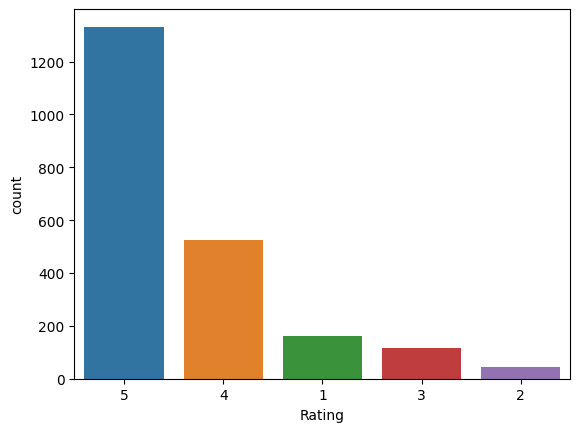

In [13]:
## countplot

sns.countplot(data=df, x='Rating', order=df.Rating.value_counts().index)

## Text Preprocessing

In [14]:
## converting rating into sentiment
def map_rating_to_sentiment(rating):
    if rating in [1, 2]:
        return 'negative'
    elif rating == 3:
        return 'neutral'
    else:                        # 4 or 5
        return 'positive'

* if rating is 1 or 2, then 'Negative', if is 0, then 'Neutral', otherwise 'Positive'

In [15]:
df['sentiment'] = df['Rating'].apply(map_rating_to_sentiment)

In [16]:
df.head()

,Product_name,Review,Rating,sentiment
0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5,positive
1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence...,5,positive
2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5,positive
3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product 👌🏻😘,5,positive
4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5,positive


In [17]:
df['sentiment'].value_counts()

sentiment
positive    1857
negative     206
neutral      118
Name: count, dtype: int64

* we have imbalanced dataset

In [18]:
df['Review']

0       Best under 60k Great performanceI got it for a...
1                                      Good perfomence...
2       Great performance but usually it has also that...
3                My wife is so happy and best product 👌🏻😘
4       Light weight laptop with new amazing features,...
                              ...                        
2299    Great display, accurate colours at this price ...
2300    Superb monitor first brought 1 used for 2 mont...
2301                                              Awesome
2302                          Only one issue with adapter
2303    Worth the money u spend for this monitor Great...
Name: Review, Length: 2181, dtype: object

In [19]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
from sklearn.utils import shuffle

df = shuffle(df, random_state=24).reset_index(drop=True)

In [21]:
df.head()

,Product_name,Review,Rating,sentiment
0,LG 190 L Direct Cool Single Door 4 Star Refrig...,Excellent product from LG this refrigerator is...,5,positive
1,Lenovo ThinkBook 13s Core i5 11th Gen - (16 GB...,A great mid range laptop with form factor even...,5,positive
2,MOTOROLA ZX2 100 cm (40 inch) Full HD LED Smar...,One of the best at this price. Sound and pictu...,4,positive
3,Mi 4A PRO 80 cm (32 inch) HD Ready LED Smart A...,"Super and good quality full HD ,Internet also ...",5,positive
4,"POCO C31 (Shadow Gray, 64 GB) (4 GB RAM)",Pros : 1. Colour and design.2. Big display at ...,3,neutral


In [22]:
## unique rating

df['Rating'].unique()

array([5, 4, 3, 2, 1])

* we have 1 to 5 ratings

In [23]:
from nltk.corpus import wordnet

In [24]:
import regex as re
import string

In [25]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 8.1 MB/s eta 0:00:00


In [26]:
import contractions

In [27]:
!pip install emoji

In [28]:
import emoji

In [29]:
# Function to expand contractions
def expand_contractions(text):
    return contractions.fix(text)

In [30]:
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = emoji.replace_emoji(text, replace='')  # Remove emojis
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    text = expand_contractions(text)  # Expand contractions
    return text

In [31]:
# Apply preprocessing
df["clean_text"] = df["Review"].apply(clean_text)

In [32]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 58.9 MB/s eta 0:00:00:00:010:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [33]:
import spacy

nlp = spacy.load("en_core_web_sm")

def lemmatize_spacy(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc])

# text = "The striped bats are hanging on their feet for best"
# print(lemmatize_spacy(text))

df["clean_text"] = df["clean_text"].apply(lemmatize_spacy)  # Apply lemmatization

In [34]:
df.head()

,Product_name,Review,Rating,sentiment,clean_text
0,LG 190 L Direct Cool Single Door 4 Star Refrig...,Excellent product from LG this refrigerator is...,5,positive,excellent product from lg this refrigerator be...
1,Lenovo ThinkBook 13s Core i5 11th Gen - (16 GB...,A great mid range laptop with form factor even...,5,positive,a great mid range laptop with form factor even...
2,MOTOROLA ZX2 100 cm (40 inch) Full HD LED Smar...,One of the best at this price. Sound and pictu...,4,positive,one of the good at this price sound and pictur...
3,Mi 4A PRO 80 cm (32 inch) HD Ready LED Smart A...,"Super and good quality full HD ,Internet also ...",5,positive,super and good quality full hd internet also s...
4,"POCO C31 (Shadow Gray, 64 GB) (4 GB RAM)",Pros : 1. Colour and design.2. Big display at ...,3,neutral,pro colour and design big display at low price...


In [35]:
df['clean_text']

0       excellent product from lg this refrigerator be...
1       a great mid range laptop with form factor even...
2       one of the good at this price sound and pictur...
3       super and good quality full hd internet also s...
4       pro colour and design big display at low price...
                              ...                        
2176                                   smooth performance
2177                                                 nice
2178                                 good for basic usage
2179    this mobile be a beast wonderful mobile for da...
2180                                            mind blow
Name: clean_text, Length: 2181, dtype: object

## Feature Enginnering

In [36]:
# Apply Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["label"] = label_encoder.fit_transform(df["sentiment"])

In [37]:
df.head()

,Product_name,Review,Rating,sentiment,clean_text,label
0,LG 190 L Direct Cool Single Door 4 Star Refrig...,Excellent product from LG this refrigerator is...,5,positive,excellent product from lg this refrigerator be...,2
1,Lenovo ThinkBook 13s Core i5 11th Gen - (16 GB...,A great mid range laptop with form factor even...,5,positive,a great mid range laptop with form factor even...,2
2,MOTOROLA ZX2 100 cm (40 inch) Full HD LED Smar...,One of the best at this price. Sound and pictu...,4,positive,one of the good at this price sound and pictur...,2
3,Mi 4A PRO 80 cm (32 inch) HD Ready LED Smart A...,"Super and good quality full HD ,Internet also ...",5,positive,super and good quality full hd internet also s...,2
4,"POCO C31 (Shadow Gray, 64 GB) (4 GB RAM)",Pros : 1. Colour and design.2. Big display at ...,3,neutral,pro colour and design big display at low price...,1


In [38]:
# Get the number of unique emotion classes
num_classes = df["label"].nunique()
print(f"Number of emotion classes: {num_classes}")  

Number of emotion classes: 3


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])
y = df['label']

In [40]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

* Now let’s have a look at the kind of reviews people leave. For this, I will use a word cloud to        visualize the most used words in the reviews column.

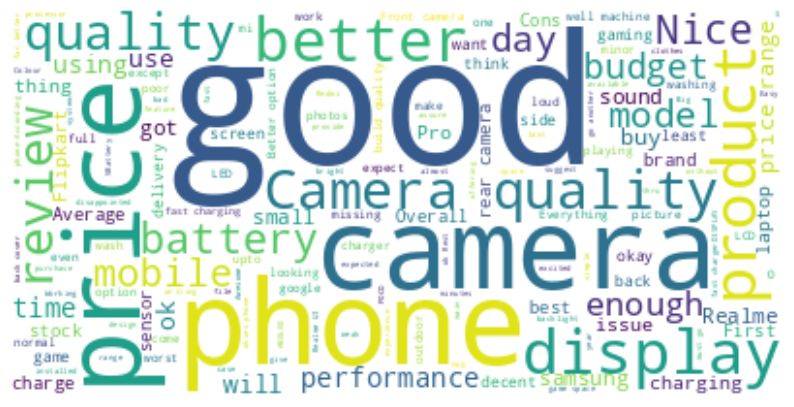

In [41]:
wordcloud = WordCloud(background_color="white").generate(df[df['label']==1]['Review'].str.cat(sep=' '))
plt.figure( figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Model Implementation(before balancing the dataset)

In [42]:
## train test split

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,confusion_matrix,classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
from sklearn.metrics import precision_score, recall_score

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Initialize Logistic Regression with multinomial classification
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)

# Fit the model
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)
y_proba_lr = lr.predict_proba(X_test)

# 1. Accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy: ", accuracy_lr)

# 2. F1 Score (Weighted)
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')
print("Logistic Regression F1 Score: ", f1_lr)

# 3. ROC AUC Score
roc_auc_lr = roc_auc_score(y_test, y_proba_lr, multi_class='ovr')
print("Logistic Regression ROC AUC: ", roc_auc_lr)

# 4. Classification Report
class_report_lr = classification_report(y_test, y_pred_lr, target_names=label_encoder.classes_)
print("Logistic Regression Classification Report:")
print(class_report_lr)

Logistic Regression Accuracy:  0.8993135011441648
Logistic Regression F1 Score:  0.874799756345563
Logistic Regression ROC AUC:  0.9321403847511176
Logistic Regression Classification Report:
              precision    recall  f1-score   support

    negative       0.96      0.49      0.65        47
     neutral       1.00      0.10      0.17        21
    positive       0.90      1.00      0.94       369

    accuracy                           0.90       437
   macro avg       0.95      0.53      0.59       437
weighted avg       0.91      0.90      0.87       437



In [45]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# Fit the model
dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)
y_proba_dt = dt.predict_proba(X_test)

# Training Accuracy
train_accuracy_dt = accuracy_score(y_train, dt.predict(X_train))

# Test Accuracy
test_accuracy_dt = accuracy_score(y_test, y_pred_dt)

# 1. Accuracy
print("Decision Tree Training Accuracy: ", train_accuracy_dt)
print("Decision Tree Test Accuracy: ", test_accuracy_dt)

# 2. F1 Score (Weighted)
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
print("Decision Tree F1 Score: ", f1_dt)

# 3. ROC AUC Score
roc_auc_dt = roc_auc_score(y_test, y_proba_dt, multi_class='ovr')
print("Decision Tree ROC AUC: ", roc_auc_dt)

# 4. Classification Report
class_report_dt = classification_report(y_test, y_pred_dt)
print("Decision Tree Classification Report: \n", class_report_dt)

Decision Tree Training Accuracy:  0.9908256880733946
Decision Tree Test Accuracy:  0.9405034324942791
Decision Tree F1 Score:  0.9416834010492069
Decision Tree ROC AUC:  0.9028199821803297
Decision Tree Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        47
           1       0.58      0.67      0.62        21
           2       0.97      0.96      0.97       369

    accuracy                           0.94       437
   macro avg       0.82      0.84      0.83       437
weighted avg       0.94      0.94      0.94       437



In [46]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)

# Training Accuracy
train_accuracy_rf = accuracy_score(y_train, rf.predict(X_train))

# Test Accuracy
test_accuracy_rf = accuracy_score(y_test, y_pred_rf)

# 1. Accuracy
print("Random Forest Training Accuracy: ", train_accuracy_rf)
print("Random Forest Test Accuracy: ", test_accuracy_rf)

# 2. F1 Score (Weighted)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
print("Random Forest F1 Score: ", f1_rf)

# 3. ROC AUC Score
roc_auc_rf = roc_auc_score(y_test, y_proba_rf, multi_class='ovr')
print("Random Forest ROC AUC: ", roc_auc_rf)
# 4. Classification Report
class_report_rf = classification_report(y_test, y_pred_rf)
print("Decision Tree Classification Report: \n", class_report_rf)

Random Forest Training Accuracy:  0.9908256880733946
Random Forest Test Accuracy:  0.954233409610984
Random Forest F1 Score:  0.9509900069867764
Random Forest ROC AUC:  0.9515699549715965
Decision Tree Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.77      0.86        47
           1       1.00      0.62      0.76        21
           2       0.95      1.00      0.97       369

    accuracy                           0.95       437
   macro avg       0.97      0.79      0.87       437
weighted avg       0.96      0.95      0.95       437



In [47]:
from sklearn.naive_bayes import MultinomialNB

# Initialize Naive Bayes
nb = MultinomialNB()

# Fit the model
nb.fit(X_train, y_train)

# Predictions
y_pred_nb = nb.predict(X_test)
y_proba_nb = nb.predict_proba(X_test)

# Training Accuracy
train_accuracy_nb = accuracy_score(y_train, nb.predict(X_train))

# Test Accuracy
test_accuracy_nb = accuracy_score(y_test, y_pred_nb)

# 1. Accuracy
print("Naive Bayes Training Accuracy: ", train_accuracy_nb)
print("Naive Bayes Test Accuracy: ", test_accuracy_nb)

# 2. F1 Score (Weighted)
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')
print("Naive Bayes F1 Score: ", f1_nb)

# 3. ROC AUC Score
roc_auc_nb = roc_auc_score(y_test, y_proba_nb, multi_class='ovr')
print("Naive Bayes ROC AUC: ", roc_auc_nb)

# 4. Classification Report
class_report_nb = classification_report(y_test, y_pred_nb)
print("Naive Bayes Classification Report: \n", class_report_nb)

Naive Bayes Training Accuracy:  0.856651376146789
Naive Bayes Test Accuracy:  0.8466819221967964
Naive Bayes F1 Score:  0.7785961832748223
Naive Bayes ROC AUC:  0.7739784709407561
Naive Bayes Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.02      0.04        47
           1       0.00      0.00      0.00        21
           2       0.85      1.00      0.92       369

    accuracy                           0.85       437
   macro avg       0.62      0.34      0.32       437
weighted avg       0.82      0.85      0.78       437



In [48]:
import xgboost as xgb

# Initialize XGBoost
xg = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Fit the model
xg.fit(X_train, y_train)

# Predictions
y_pred_xg = xg.predict(X_test)
y_proba_xg = xg.predict_proba(X_test)

# Training Accuracy
train_accuracy_xg = accuracy_score(y_train, xg.predict(X_train))

# Test Accuracy
test_accuracy_xg = accuracy_score(y_test, y_pred_xg)

# 1. Accuracy
print("XGBoost Training Accuracy: ", train_accuracy_xg)
print("XGBoost Test Accuracy: ", test_accuracy_xg)

# 2. F1 Score (Weighted)
f1_xg = f1_score(y_test, y_pred_xg, average='weighted')
print("XGBoost F1 Score: ", f1_xg)

# 3. ROC AUC Score
roc_auc_xg = roc_auc_score(y_test, y_proba_xg, multi_class='ovr')
print("XGBoost ROC AUC: ", roc_auc_xg)

# 5. Classification Report
class_report_xg = classification_report(y_test, y_pred_xg)
print("XGBoost Classification Report: \n", class_report_xg)

XGBoost Training Accuracy:  0.9902522935779816
XGBoost Test Accuracy:  0.9610983981693364
XGBoost F1 Score:  0.9587028642817248
XGBoost ROC AUC:  0.9437601252362082
XGBoost Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.85      0.90        47
           1       1.00      0.62      0.76        21
           2       0.96      0.99      0.98       369

    accuracy                           0.96       437
   macro avg       0.97      0.82      0.88       437
weighted avg       0.96      0.96      0.96       437



In [49]:
# Define model names and their respective metric scores
model_results = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Multinomial NB', 'XGBoost'],
    'Test Accuracy': [accuracy_lr, test_accuracy_dt, test_accuracy_rf, test_accuracy_nb, test_accuracy_xg],
    'F1 Score': [f1_lr, f1_dt, f1_rf, f1_nb, f1_xg],
    'ROC AUC': [roc_auc_lr, roc_auc_dt, roc_auc_rf, roc_auc_nb, roc_auc_xg]
}

# Create DataFrame
results_df = pd.DataFrame(model_results)

# Display table
results_df

,Model,Test Accuracy,F1 Score,ROC AUC
0,Logistic Regression,0.899314,0.874800,0.932140
1,Decision Tree,0.940503,0.941683,0.902820
2,Random Forest,0.954233,0.950990,0.951570
3,Multinomial NB,0.846682,0.778596,0.773978
4,XGBoost,0.961098,0.958703,0.943760


## Now Balancing Dataset using SMOTE

In [50]:
!pip uninstall -y scikit-learn imbalanced-learn

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
Found existing installation: imbalanced-learn 0.13.0
Uninstalling imbalanced-learn-0.13.0:
  Successfully uninstalled imbalanced-learn-0.13.0


In [51]:
!pip install scikit-learn==1.2.2 imbalanced-learn==0.10.1 --no-cache-dir

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 99.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 327.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nilearn 0.11.1 requires scikit-learn>=1.4.0, but you have scikit-learn 1.2.2 which is incompatible.
bigframes 1.36.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.


In [52]:
from imblearn.over_sampling import SMOTE

In [53]:
# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE - Class distribution:",y_train.value_counts())
print("After SMOTE - Class distribution:",y_train_res.value_counts())

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x78a6a869b100>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: dlopen() error


Before SMOTE - Class distribution: label
2    1488
0     159
1      97
Name: count, dtype: int64
After SMOTE - Class distribution: label
2    1488
0    1488
1    1488
Name: count, dtype: int64


In [54]:
X_train_res.shape, y_train_res.shape

((4464, 4182), (4464,))

## Model Implementation(after balancing the dataset)

## Logistic Rregression

In [55]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)

# Train the model on the resampled dataset
lr.fit(X_train_res, y_train_res)

# Predictions
y_pred_lr = lr.predict(X_test)
y_proba_lr = lr.predict_proba(X_test)

# 1. Accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy: ", accuracy_lr)

# 2. F1 Score
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')
print("Logistic Regression F1 Score: ", f1_lr)

# 3. ROC AUC Score
roc_auc_lr = roc_auc_score(y_test, y_proba_lr, multi_class='ovr')
print("Logistic Regression ROC AUC: ", roc_auc_lr)

# 4. Classification Report
class_report_lr = classification_report(y_test, y_pred_lr)
print("Decision Tree Classification Report: \n", class_report_lr)

Logistic Regression Accuracy:  0.8924485125858124
Logistic Regression F1 Score:  0.9092117703767908
Logistic Regression ROC AUC:  0.9451135712558146
Decision Tree Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.89      0.92        47
           1       0.31      0.76      0.44        21
           2       0.97      0.90      0.93       369

    accuracy                           0.89       437
   macro avg       0.75      0.85      0.77       437
weighted avg       0.94      0.89      0.91       437



In [56]:
# Precision Score
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
print("Logistic Regression Precision Score: ", precision_lr)
# Recall Score
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
print("Logistic Regression Recall Score: ", recall_lr)

Logistic Regression Precision Score:  0.9374425582918615
Logistic Regression Recall Score:  0.8924485125858124


## Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree Classifier
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Train the model on the resampled dataset
dt.fit(X_train_res, y_train_res)

# Predictions
y_pred_dt = dt.predict(X_test)
y_proba_dt = dt.predict_proba(X_test)

# 1. Accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Test Accuracy: ", accuracy_dt)

# 2. F1 Score
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
print("Decision Tree F1 Score: ", f1_dt)

# 3. ROC AUC Score
roc_auc_dt = roc_auc_score(y_test, y_proba_dt, multi_class='ovr')
print("Decision Tree ROC AUC: ", roc_auc_dt)

# 4. Classification Report
class_report_dt = classification_report(y_test, y_pred_dt)
print("Decision Tree Classification Report: \n", class_report_dt)

Decision Tree Test Accuracy:  0.9038901601830663
Decision Tree F1 Score:  0.9144594202502996
Decision Tree ROC AUC:  0.900785797649732
Decision Tree Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.89      0.88        47
           1       0.37      0.71      0.48        21
           2       0.97      0.92      0.94       369

    accuracy                           0.90       437
   macro avg       0.74      0.84      0.77       437
weighted avg       0.93      0.90      0.91       437



In [58]:
# Precision Score
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
print("Decision Tree Precision Score: ", precision_dt)

# Recall Score
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
print("Decision Tree Recall Score: ", recall_dt)

Decision Tree Precision Score:  0.93181802872633
Decision Tree Recall Score:  0.9038901601830663


## Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier
rf = RandomForestClassifier(class_weight = 'balanced',random_state=42)

# Train the model on the resampled dataset
rf.fit(X_train_res, y_train_res)

# Predictions
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)

# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Test Accuracy: ", accuracy_rf)

# F1 Score
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
print("Random Forest F1 Score: ", f1_rf)

# ROC AUC Score
roc_auc_rf = roc_auc_score(y_test, y_proba_rf, multi_class='ovr')
print("Random Forest ROC AUC: ", roc_auc_rf)

# Classification Report
class_report_rf = classification_report(y_test, y_pred_rf)
print("Random Forest Classification Report: \n", class_report_rf)

Random Forest Test Accuracy:  0.9382151029748284
Random Forest F1 Score:  0.9418610839384639
Random Forest ROC AUC:  0.9549540134049354
Random Forest Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.87      0.93        47
           1       0.50      0.71      0.59        21
           2       0.97      0.96      0.96       369

    accuracy                           0.94       437
   macro avg       0.82      0.85      0.83       437
weighted avg       0.95      0.94      0.94       437



In [60]:
# Precision Score
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
print("Random Forest Precision Score: ", precision_rf)

# Recall Score
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
print("Random Forest Recall Score: ", recall_rf)

Random Forest Precision Score:  0.9482875042202797
Random Forest Recall Score:  0.9382151029748284


## Multinomial Naive Bayes

In [61]:
from sklearn.naive_bayes import MultinomialNB

# Initialize Multinomial Naive Bayes
mnb = MultinomialNB()

# Train the model on the resampled dataset
mnb.fit(X_train_res, y_train_res)

# Predictions
y_pred_mnb = mnb.predict(X_test)
y_proba_mnb = mnb.predict_proba(X_test)

# 1. Accuracy
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
print("Multinomial Naive Bayes Accuracy: ", accuracy_mnb)

# 2. F1 Score (Weighted)
f1_mnb = f1_score(y_test, y_pred_mnb, average='weighted')
print("Multinomial Naive Bayes F1 Score: ", f1_mnb)

# 3. ROC AUC Score
roc_auc_mnb = roc_auc_score(y_test, y_proba_mnb, multi_class='ovr')
print("Multinomial Naive Bayes ROC AUC: ", roc_auc_mnb)

# 4. Classification Report
class_report_mnb = classification_report(y_test, y_pred_mnb)
print("Multinomial Naive Bayes Classification Report: \n", class_report_mnb)

Multinomial Naive Bayes Accuracy:  0.8215102974828375
Multinomial Naive Bayes F1 Score:  0.8626460671875211
Multinomial Naive Bayes ROC AUC:  0.9318434495714021
Multinomial Naive Bayes Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        47
           1       0.19      0.76      0.31        21
           2       0.98      0.81      0.89       369

    accuracy                           0.82       437
   macro avg       0.69      0.83      0.70       437
weighted avg       0.93      0.82      0.86       437



In [62]:
# Precision Score
precision_mnb = precision_score(y_test, y_pred_mnb, average='weighted')
print("Multinomial NB Precision Score: ", precision_mnb)

# Recall Score
recall_mnb = recall_score(y_test, y_pred_mnb, average='weighted')
print("Multinomial NB Recall Score: ", recall_mnb)

Multinomial NB Precision Score:  0.9328020869320948
Multinomial NB Recall Score:  0.8215102974828375


## XGBoost

In [63]:
from xgboost import XGBClassifier

# Initialize XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Train the model
xgb.fit(X_train_res, y_train_res)

# Predictions
y_pred_xgb = xgb.predict(X_test)
y_proba_xgb = xgb.predict_proba(X_test)
y_sc = xgb.predict(X_train_res)

# Evaluation
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')
roc_auc_xgb = roc_auc_score(y_test, y_proba_xgb, multi_class='ovr')
class_report_xgb = classification_report(y_test, y_pred_xgb)
training_acc_xgb = accuracy_score(y_train_res, y_sc)

# Output Results
print("XGBoost Results")
print("Training Accuracy:", accuracy_score(y_train_res, xgb.predict(X_train_res)))
print("Test Accuracy:", accuracy_xgb)
print("F1 Score:", f1_xgb)
print("ROC AUC:", roc_auc_xgb)
print("Classification Report:\n", class_report_xgb)

XGBoost Results
Training Accuracy: 0.9845430107526881
Test Accuracy: 0.9267734553775744
F1 Score: 0.9314945042076089
ROC AUC: 0.9614845721730472
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90        47
           1       0.47      0.71      0.57        21
           2       0.97      0.95      0.96       369

    accuracy                           0.93       437
   macro avg       0.79      0.84      0.81       437
weighted avg       0.94      0.93      0.93       437



In [64]:
# Precision
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')

# Recall
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')

print("Precision Score:", precision_xgb)
print("recall Score:", recall_xgb)

Precision Score: 0.9390692827634216
recall Score: 0.9267734553775744


## Results after balancing the dataset

In [65]:
# Define model names and their respective metric scores
model_results = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Multinomial NB', 'XGBoost'],
    'Test Accuracy': [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_mnb, accuracy_xgb],
    'Precision Score': [precision_lr, precision_dt, precision_rf, precision_mnb, precision_xgb],
    'Recall Score': [recall_lr, recall_dt, recall_rf, recall_mnb, recall_xgb],
    'F1 Score': [f1_lr, f1_dt, f1_rf, f1_mnb, f1_xgb],
    'ROC AUC': [roc_auc_lr, roc_auc_dt, roc_auc_rf, roc_auc_mnb, roc_auc_xgb]
}

# Create DataFrame
results_df = pd.DataFrame(model_results)

# Display table
results_df

,Model,Test Accuracy,Precision Score,Recall Score,F1 Score,ROC AUC
0,Logistic Regression,0.892449,0.937443,0.892449,0.909212,0.945114
1,Decision Tree,0.903890,0.931818,0.903890,0.914459,0.900786
2,Random Forest,0.938215,0.948288,0.938215,0.941861,0.954954
3,Multinomial NB,0.821510,0.932802,0.821510,0.862646,0.931843
4,XGBoost,0.926773,0.939069,0.926773,0.931495,0.961485


* After evaluating various models for the classification task, the XGBoost model has shown superior performance. The XGBoost model achieved:

* Test Accuracy: 92.67%
* F1 Score: 93.14%
* ROC AUC: 96.14%

#### Now I will analyze the sentiments of Flipkart reviews by adding three columns in this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the reviews

In [66]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["clean_text"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["clean_text"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["clean_text"]]
new_df = df[["clean_text", "Positive", "Negative", "Neutral"]]
new_df.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,clean_text,Positive,Negative,Neutral
0,excellent product from lg this refrigerator be...,0.265,0.000,0.735
1,a great mid range laptop with form factor even...,0.256,0.000,0.744
2,one of the good at this price sound and pictur...,0.248,0.000,0.752
3,super and good quality full hd internet also s...,0.466,0.000,0.534
4,pro colour and design big display at low price...,0.124,0.028,0.848


#### Now let’s see how most of the reviewers think about the products and services of Flipkart

In [67]:
x = sum(new_df["Positive"])
y = sum(new_df["Negative"])
z = sum(new_df["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


* So most of the reviews are neutral. Let’s have a look at the total of Positive, Negative, and Neutral sentiment scores to find a conclusion about Flipkart reviews

In [68]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  802.6420000000013
Negative:  95.46300000000002
Neutral:  1282.896000000003


* so we have more no. of neutral reviews.